# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
latlngCity = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    latlngCity.append(city)
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.

  
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_count = len(cities)
base_url = "http://api.openweathermap.org/data/2.5/weather?"
i=0
f = open(output_data_file, "w+")
fr = csv.writer(f)
#found_city_count = 0
#not_found_city_c = 0
header = ['City','Cloudiness','Country','Date','Humidity','Lat', 'Lon', 'Max Temp', 'Wind Speed']
fr.writerow(header)
for i in range(city_count) :
    city = cities[i]
    city_data = []

    # Build query URL
    query_url = base_url + "appid=" + api_key + "&q=" + city
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()

    if weather_json['cod'] == '404' :
        print(f'Error!!! Processing City : {city} , not found \n {query_url}')
    else :        
        city_ID = weather_json['id']
        print(f'Processed City : {city} , city ID: {city_ID} \n {query_url} ')

        #writing into csv file
        city_data.append(weather_json['name'])
        city_data.append(weather_json['clouds']['all'])
        city_data.append(weather_json['sys']['country'])
        city_data.append(weather_json['dt'])
        city_data.append(weather_json['main']['humidity'])
        city_data.append(weather_json['coord']['lat'])
        city_data.append(weather_json['coord']['lon'])
        city_data.append(weather_json['main']['temp'])
        city_data.append(weather_json['wind']['speed'])
    
        print(city_data)
        fr.writerow(city_data)
f.close()  



Processed City : jamestown , city ID: 2069194 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=jamestown 
['Jamestown', 12, 'AU', 1553675421, 66, -33.21, 138.6, 289.507, 2.06]
Processed City : susanville , city ID: 5572400 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=susanville 
['Susanville', 90, 'US', 1553675244, 86, 40.42, -120.65, 276.54, 1.5]
Processed City : borodino , city ID: 1508943 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=borodino 
['Borodino', 0, 'RU', 1553675497, 87, 55.9, 94.89, 275.057, 2.31]
Processed City : hermanus , city ID: 3366880 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=hermanus 
['Hermanus', 0, 'ZA', 1553674577, 64, -34.42, 19.24, 297.97, 0.45]
Processed City : saint george , city ID: 262462 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=sai

Processed City : port alfred , city ID: 964432 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=port alfred 
['Port Alfred', 48, 'ZA', 1553675507, 75, -33.59, 26.89, 295.407, 8.51]
Processed City : luderitz , city ID: 3355672 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=luderitz 
['Luderitz', 20, 'NA', 1553675335, 98, -26.65, 15.16, 291.107, 4.11]
Processed City : punta arenas , city ID: 3874787 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=punta arenas 
['Punta Arenas', 40, 'CL', 1553674947, 62, -53.16, -70.91, 283.91, 12.9]
Error!!! Processing City : illoqqortoormiut , not found 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=illoqqortoormiut
Error!!! Processing City : bengkulu , not found 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=bengkulu
Processed City : atuona , ci

Error!!! Processing City : sentyabrskiy , not found 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=sentyabrskiy
Processed City : port blair , city ID: 1259385 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=port blair 
['Port Blair', 24, 'IN', 1553675519, 100, 11.67, 92.75, 302.707, 2.41]
Processed City : tommot , city ID: 2015179 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=tommot 
['Tommot', 64, 'RU', 1553675519, 55, 58.97, 126.27, 262.557, 2.41]
Processed City : barrow , city ID: 3833859 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=barrow 
['Barrow', 0, 'AR', 1553675240, 91, -38.31, -60.23, 280.857, 3.21]
Processed City : matara , city ID: 3948642 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=matara 
['Matara', 92, 'PE', 1553675520, 96, -13.74, -72.9, 280.507, 0.31]
P

Processed City : albury , city ID: 2178174 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=albury 
['Albury', 0, 'AU', 1553675125, 35, -36.08, 146.92, 294.79, 2.6]
Processed City : torbay , city ID: 6167817 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=torbay 
['Torbay', 90, 'CA', 1553675522, 73, 47.66, -52.73, 267.32, 6.7]
Processed City : sioux lookout , city ID: 6148373 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=sioux lookout 
['Sioux Lookout', 90, 'CA', 1553673600, 74, 50.1, -91.92, 275.57, 4.1]
Processed City : hobart , city ID: 2163355 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=hobart 
['Hobart', 0, 'AU', 1553675054, 48, -42.88, 147.33, 288.18, 2.6]
Processed City : ahipara , city ID: 2194098 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=ahipara 
['Ahipara', 9

Processed City : leo , city ID: 2358382 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=leo 
['Leo', 76, 'BF', 1553675545, 58, 11.1, -2.1, 301.907, 3.46]
Processed City : rajpur , city ID: 1259283 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=rajpur 
['Rajpur', 0, 'IN', 1553675545, 25, 26.3, 79.68, 307.457, 4.76]
Processed City : longyearbyen , city ID: 2729907 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=longyearbyen 
['Longyearbyen', 40, 'NO', 1553673000, 62, 78.22, 15.63, 267.15, 8.2]
Processed City : mlonggo , city ID: 1635164 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=mlonggo 
['Mlonggo', 75, 'ID', 1553671800, 78, -6.53, 110.7, 300.15, 5.1]
Processed City : mahon , city ID: 2965139 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=mahon 
['Mahon', 20, 'IE', 155367360

Processed City : conceicao da barra , city ID: 3465769 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=conceicao da barra 
['Conceicao da Barra', 48, 'BR', 1553675558, 93, -18.59, -39.73, 299.357, 5.36]
Processed City : codrington , city ID: 2160063 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=codrington 
['Codrington', 90, 'AU', 1553675486, 88, -28.95, 153.24, 294.01, 2.56]
Processed City : mount isa , city ID: 2065594 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=mount isa 
['Mount Isa', 90, 'AU', 1553673600, 78, -20.73, 139.49, 298.15, 8.7]
Processed City : thompson , city ID: 6165406 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=thompson 
['Thompson', 90, 'CA', 1553673600, 86, 55.74, -97.86, 274.15, 1]
Processed City : puerto del rosario , city ID: 2512186 
 http://api.openweathermap.org/data/2.5/weather?appid

Processed City : kochki , city ID: 1503061 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=kochki 
['Kochki', 64, 'RU', 1553675582, 98, 54.33, 80.49, 275.457, 4.56]
Processed City : nishihara , city ID: 1850144 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=nishihara 
['Nishihara', 1, 'JP', 1553675557, 12, 35.74, 139.53, 291.41, 2.1]
Processed City : ketchikan , city ID: 5554428 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=ketchikan 
['Ketchikan', 90, 'US', 1553673360, 75, 55.34, -131.65, 281.48, 4.6]
Processed City : tsivilsk , city ID: 480851 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=tsivilsk 
['Tsivilsk', 75, 'RU', 1553673600, 86, 55.87, 47.47, 274.15, 5]
Processed City : miramar , city ID: 3622854 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=miramar 
['Miramar', 

Processed City : burns lake , city ID: 5911745 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=burns lake 
['Burns Lake', 76, 'CA', 1553675604, 92, 54.23, -125.76, 272.557, 0.76]
Processed City : punta alta , city ID: 3429886 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=punta alta 
['Punta Alta', 0, 'AR', 1553673600, 82, -27.46, -55.82, 289.15, 2.11]
Processed City : pervomayskoye , city ID: 1495256 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=pervomayskoye 
['Pervomayskoye', 56, 'RU', 1553675605, 91, 57.07, 86.23, 276.857, 2.41]
Processed City : chokurdakh , city ID: 2126123 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=chokurdakh 
['Chokurdakh', 8, 'RU', 1553675605, 58, 70.62, 147.9, 251.857, 5.26]
Error!!! Processing City : korla , not found 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039

Processed City : penukonda , city ID: 1259905 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=penukonda 
['Penukonda', 0, 'IN', 1553675616, 26, 14.08, 77.6, 309.457, 3.86]
Processed City : arlit , city ID: 2447513 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=arlit 
['Arlit', 36, 'NE', 1553675617, 49, 18.74, 7.39, 299.457, 2.11]
Processed City : jalu , city ID: 86049 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=jalu 
['Jalu', 0, 'LY', 1553675387, 50, 29.03, 21.55, 295.657, 2.61]
Processed City : mount gambier , city ID: 2156643 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=mount gambier 
['Mount Gambier', 80, 'AU', 1553673600, 63, -37.83, 140.78, 291.15, 2.1]
Processed City : bo phloi , city ID: 1153850 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=bo phloi 
['Bo Phloi',

Processed City : qasigiannguit , city ID: 3420768 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=qasigiannguit 
['Qasigiannguit', 68, 'GL', 1553673000, 77, 68.82, -51.19, 257.15, 3.6]
Processed City : sao raimundo das mangabeiras , city ID: 3388147 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=sao raimundo das mangabeiras 
['Sao Raimundo das Mangabeiras', 20, 'BR', 1553675628, 91, -7.02, -45.48, 294.657, 1.21]
Processed City : port macquarie , city ID: 2152659 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=port macquarie 
['Port Macquarie', 75, 'AU', 1553675405, 60, -31.43, 152.91, 294.66, 2.1]
Processed City : pisco , city ID: 3932145 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=pisco 
['Pisco', 36, 'PE', 1553673600, 82, -13.71, -76.2, 292.15, 1]
Processed City : havre-saint-pierre , city ID: 5972291 
 http://api

Processed City : krasnoarmeysk , city ID: 542463 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=krasnoarmeysk 
['Krasnoarmeysk', 0, 'RU', 1553673932, 59, 56.12, 38.15, 275.25, 5]
Processed City : raudeberg , city ID: 3146487 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=raudeberg 
['Raudeberg', 75, 'NO', 1553675703, 93, 61.99, 5.14, 278.06, 2.6]
Processed City : wyndham , city ID: 2639447 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=wyndham 
['Wyndham', 0, 'GB', 1553675710, 81, 51.61, -3.54, 280.33, 1.5]
Processed City : antalaha , city ID: 1071296 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=antalaha 
['Antalaha', 0, 'MG', 1553675715, 100, -14.9, 50.28, 302.157, 2.06]
Processed City : arman , city ID: 2127060 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=arman 
['Arma

Processed City : gushikawa , city ID: 1863495 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=gushikawa 
['Gushikawa', 90, 'JP', 1553675546, 64, 26.35, 127.87, 295.04, 5.1]
Processed City : san juan , city ID: 1692193 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=san juan 
['San Juan', 75, 'PH', 1553675589, 52, 14.6, 121.03, 303.79, 6.2]
Processed City : karratha , city ID: 6620339 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=karratha 
['Karratha', 0, 'AU', 1553675726, 85, -20.74, 116.85, 302.407, 2.51]
Processed City : araouane , city ID: 2460954 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=araouane 
['Araouane', 44, 'ML', 1553675727, 27, 18.9, -3.53, 305.607, 5.21]
Processed City : yeppoon , city ID: 2142316 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=yeppoon 
['Yep

Processed City : isangel , city ID: 2136825 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=isangel 
['Isangel', 36, 'VU', 1553675106, 100, -19.55, 169.27, 300.157, 9.01]
Processed City : kavaratti , city ID: 1267390 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=kavaratti 
['Kavaratti', 0, 'IN', 1553675738, 100, 10.57, 72.64, 302.257, 3.76]
Processed City : halifax , city ID: 6324729 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=halifax 
['Halifax', 5, 'CA', 1553675522, 67, 44.65, -63.58, 266.63, 2.1]
Processed City : walla walla , city ID: 5814916 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=walla walla 
['Walla Walla', 1, 'US', 1553675502, 70, 46.06, -118.33, 277.78, 1.5]
Processed City : leninskoye , city ID: 1510350 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=lenin

Processed City : palmer , city ID: 2067070 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=palmer 
['Palmer', 0, 'AU', 1553675737, 52, -34.85, 139.16, 294.19, 4.1]
Processed City : liepaja , city ID: 457954 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=liepaja 
['Liepaja', 24, 'LV', 1553673000, 86, 56.52, 21.02, 277.15, 5.1]
Processed City : port moresby , city ID: 2088122 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=port moresby 
['Port Moresby', 40, 'PG', 1553673600, 66, -9.47, 147.16, 303.15, 3.1]
Processed City : wahiawa , city ID: 5853992 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=wahiawa 
['Wahiawa', 90, 'US', 1553675668, 88, 21.5, -158.02, 294.14, 3.01]
Error!!! Processing City : palabuhanratu , not found 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=palabuhanr

Processed City : chernogorsk , city ID: 1508054 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=chernogorsk 
['Chernogorsk', 0, 'RU', 1553673600, 33, 53.83, 91.31, 279.15, 1]
Processed City : the valley , city ID: 3573374 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=the valley 
['The Valley', 20, 'AI', 1553674582, 78, 18.22, -63.06, 298.15, 5.1]
Processed City : rawson , city ID: 3839307 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=rawson 
['Rawson', 0, 'AR', 1553675764, 45, -43.3, -65.11, 284.207, 4.16]
Processed City : lompoc , city ID: 5367788 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=lompoc 
['Lompoc', 40, 'US', 1553675213, 87, 34.64, -120.46, 284.41, 2.6]
Processed City : henties bay , city ID: 3356832 
 http://api.openweathermap.org/data/2.5/weather?appid=0c5c174a4cc039669c3412f80683cbc6&q=henties bay 


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
df = pd.DataFrame(pd.read_csv(output_data_file))
df

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Jamestown,12,AU,1553675421,66,-33.21,138.60,289.507,2.06
1,Susanville,90,US,1553675244,86,40.42,-120.65,276.540,1.50
2,Borodino,0,RU,1553675497,87,55.90,94.89,275.057,2.31
3,Hermanus,0,ZA,1553674577,64,-34.42,19.24,297.970,0.45
4,Saint George,90,GR,1553675013,66,39.45,22.34,286.100,3.10
5,Sitka,0,US,1553674590,79,37.17,-99.65,284.260,6.71
6,Gizo,75,IL,1553675332,63,31.80,34.94,290.990,7.20
7,Srednekolymsk,76,RU,1553675498,69,67.46,153.71,259.157,4.81
8,Touros,40,BR,1553673600,100,-5.20,-35.46,297.150,2.10
9,Vila Velha,64,BR,1553675291,94,-3.71,-38.60,297.960,2.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

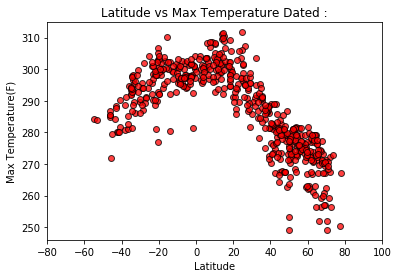

In [15]:
x_axis = df['Lat']
plt.scatter(x_axis, df['Max Temp'], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.title("Latitude vs Max Temperature " + "Dated :")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.xlim(-80,100)
plt.savefig("./MaxTemperaturePlot.png")
plt.show()

#### Latitude vs. Humidity Plot

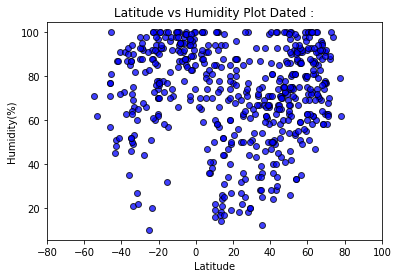

In [16]:
plt.scatter(x_axis, df['Humidity'], marker="o", facecolors="b", edgecolors="black", alpha=0.75)
plt.title("Latitude vs Humidity Plot " + "Dated :")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.xlim(-80,100)
plt.savefig("./HumidityPlot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

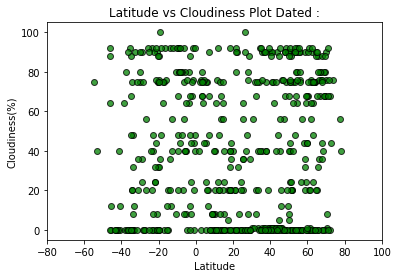

In [17]:
plt.scatter(x_axis, df['Cloudiness'], marker="o", facecolors="green", edgecolors="black", alpha=0.75)
plt.title("Latitude vs Cloudiness Plot " + "Dated :")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.xlim(-80,100)
plt.savefig("./CloudinessPlot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

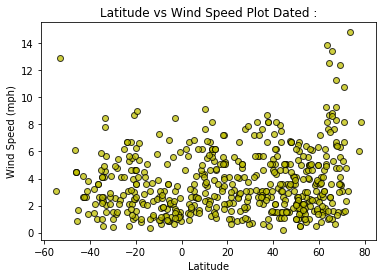

In [11]:
plt.scatter(x_axis, df['Wind Speed'], marker="o", facecolors="y", edgecolors="black", alpha=0.75)
plt.title("Latitude vs Wind Speed Plot " + "Dated :")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlim(-80,100)
plt.savefig("./WindSpeedPlot.png")
plt.show()